                                    # Tarea Semana 2
## Filtros de Audio
Al audio correspondiente a su voz con ruido blanco, realice una comparación entre filtros IIR y FIR para encontrar al mejor filDebe al menos probar 4 filtros diferentes de los dos tipos.tro pasa banda. Consulte alguna métrica que le permita tomar la decisión. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, cheby1, filtfilt, firwin, lfilter, freqz



# Cargar archivo de audio
filename = "H:/MaestriaUIDE/Fundamentos de imágenes digitales y operaciones básicas/clase2/practica/Data/sonido_blanco.wav"

fs, audio = wavfile.read(filename)

# Si el audio es estéreo, se convierte a mono
if audio.ndim > 1:
    audio = audio[:, 0]

# Normalizar el audio
audio = audio / np.max(np.abs(audio))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, cheby1, filtfilt, firwin, lfilter, freqz
from IPython.display import Audio


# Cargar archivo de audio
filename = "H:/MaestriaUIDE/Fundamentos de imágenes digitales y operaciones básicas/clase2/practica/Data/sonido_blanco.wav"

fs, audio = wavfile.read(filename)

# Si el audio es estéreo, se convierte a mono
if audio.ndim > 1:
    audio = audio[:, 0]

# Normalizar el audio
audio = audio / np.max(np.abs(audio))


Verificar la frecuencia de la Voz

In [19]:
lowcut = 300
highcut = 3400

low = lowcut / (fs / 2)
high = highcut / (fs / 2)


### FILTROS IIR
Son filtros digitales que utilizan retroalimentación, calculando cada salida basándose en las entradas actuales, anteriores y en salidas previas.

Filtros a usar:

### IIR 1 – Butterworth
son filtros digitales o analógicos de Respuesta a Impulsos Infinitos (IIR) diseñados para tener una respuesta en frecuencia lo más plana posible en la banda de paso (sin ondulaciones).

In [20]:
b_butt, a_butt = butter(4, [low, high], btype='bandpass')
audio_iir_butt = filtfilt(b_butt, a_butt, audio)


### IIR 2 – Chebyshev Tipo I
 Son filtros digitales o analógicos caracterizados por tener una caída de frecuencia más pronunciada que los filtros Butterworth, lograda al permitir un rizado (ondulación) constante en la banda de paso y una respuesta monótona (plana) en la banda de rechazo.



In [23]:
b_cheb, a_cheb = cheby1(4, 1, [low, high], btype='bandpass')
audio_iir_cheb = filtfilt(b_cheb, a_cheb, audio)


### FILTROS FIR
Son filtros digitales que procesan señales utilizando únicamente muestras de entrada actuales y pasadas, sin retroalimentación.

#### FIR orden 101
Es un filtro digital no recursivo con 102 coeficientes (orden \(N+1\)). Se caracteriza por tener una respuesta al impulso finita, lo que garantiza estabilidad. Su alto orden (101) permite una pendiente de corte pronunciada y mayor atenuación, manteniendo una fase lineal

In [24]:
fir_101 = firwin(101, [lowcut, highcut], fs=fs, pass_zero=False)
audio_fir_101 = lfilter(fir_101, 1.0, audio)


### FIR orden 301
Es un sistema estable y de fase lineal, ideal para aplicaciones que requieren un filtrado preciso de audio o señales, ya que su alto orden permite pendientes de transición muy estrechas y una alta atenuación de frecuencias no deseadas, a costa de un mayor retardo en tiempo real

In [25]:
fir_301 = firwin(301, [lowcut, highcut], fs=fs, pass_zero=False)
audio_fir_301 = lfilter(fir_301, 1.0, audio)

## Métrica común es la relación señal-ruido (SNR). 
Es la proporción entre la potencia de una señal útil (información relevante) y la potencia del ruido de fondo (información irrelevante o interferencia). Una SNR alta indica mayor claridad y calidad, significando que la señal es mucho más intensa que el ruido.

In [26]:
def snr(signal, noise):
    return 10 * np.log10(np.sum(signal**2) / np.sum(noise**2))

# Estimación del ruido eliminado
noise_iir = audio - audio_iir
noise_fir_101 = audio - audio_fir_101
noise_fir_301 = audio - audio_fir_301

print("SNR IIR:", snr(audio_iir, noise_iir))
print("SNR FIR 101:", snr(audio_fir_101, noise_fir_101))
print("SNR FIR 301:", snr(audio_fir_301, noise_fir_301))


SNR IIR: -0.9545485601684951
SNR FIR 101: -5.762508582571383
SNR FIR 301: -5.000723012186548


In [12]:
pip install sounddevice


   ------------- -------------------------- 1/3 [cffi]
   ---------------------------------------- 3/3 [sounddevice]

Note: you may need to restart the kernel to use updated packages.


Reproducción del sonido

In [40]:
print("Sonido Original")
sd.play(audio, fs); 
sd.wait()

print("Filtro IIR Butterworth")
wavfile.write("audio_IIR_Butterworth.wav", fs, audio_iir_butt.astype(np.float32))
display(Audio(audio_iir_butt, rate= fs))
sd.play(audio_iir_butt, fs); 
sd.wait()

print("Filtro IIR Chebyshev")
wavfile.write("audio_IIR_Chebyshev.wav", fs, audio_iir_cheb.astype(np.float32))
display(Audio(audio_iir_cheb, rate= fs))
sd.play(audio_iir_cheb, fs); 
sd.wait()

print("Filtro FIR 101")
wavfile.write("audio_FIR_101.wav", fs, audio_fir_101.astype(np.float32))
display(Audio(audio_fir_101, rate= fs))
sd.play(audio_fir_101, fs); 
sd.wait()

print("Filtro FIR 301")
wavfile.write("audio_FIR_301.wav", fs, audio_fir_301.astype(np.float32))
display(Audio(audio_fir_301, rate= fs))
sd.play(audio_fir_301, fs); 
sd.wait()

Sonido Original
Filtro IIR Butterworth


Filtro IIR Chebyshev


Filtro FIR 101


Filtro FIR 301


### Graficas de comparación de Filtros

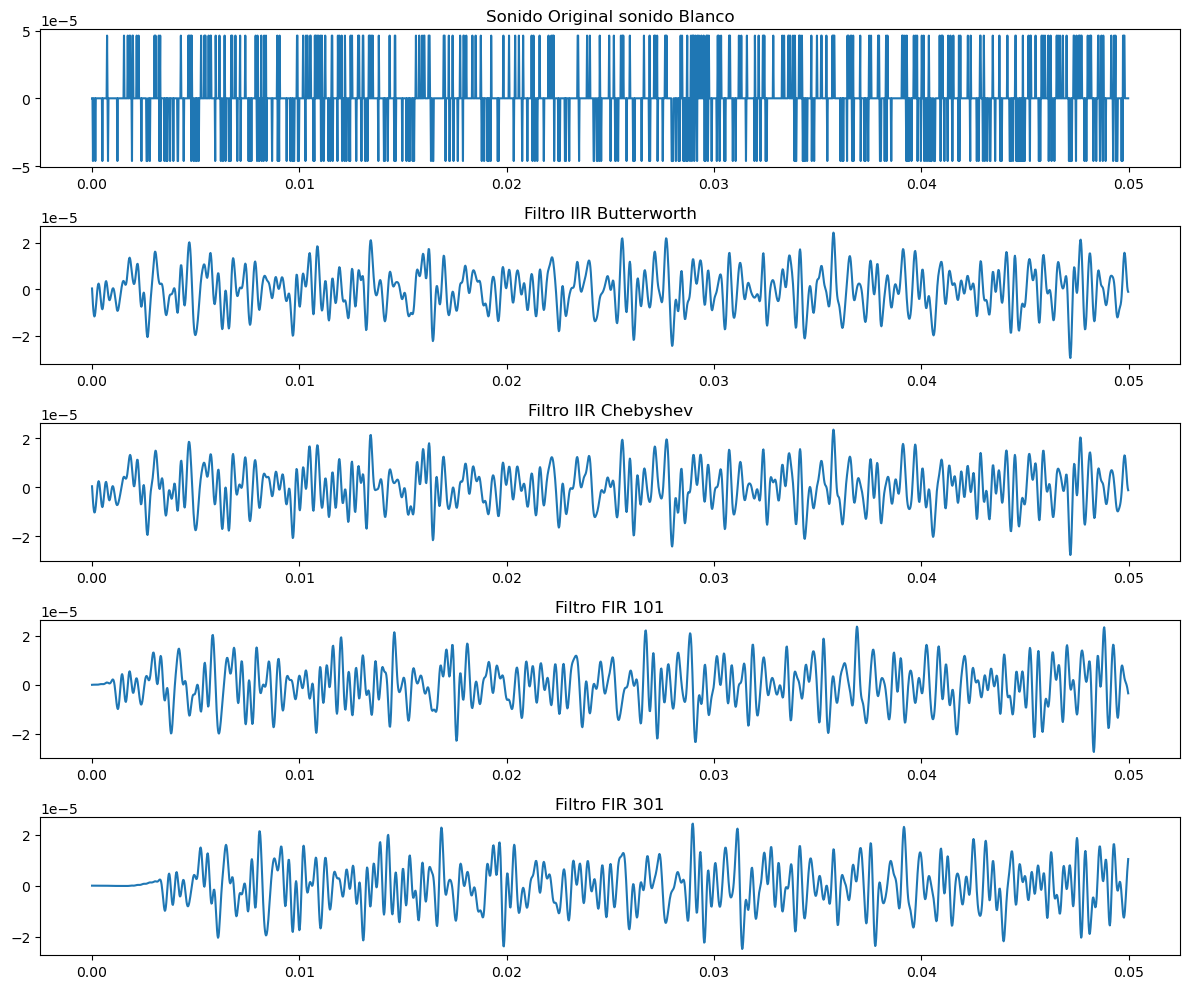

In [41]:
samples = int(0.05 * fs)

plt.figure(figsize=(12,10))

signals = [
    (audio, "Sonido Original sonido Blanco"),
    (audio_iir_butt, "Filtro IIR Butterworth"),
    (audio_iir_cheb, "Filtro IIR Chebyshev"),
    (audio_fir_101, "Filtro FIR 101"),
    (audio_fir_301, "Filtro FIR 301")
]

for i, (sig, title) in enumerate(signals):
    plt.subplot(5,1,i+1)
    plt.plot(t[:samples], sig[:samples])
    plt.title(title)

plt.tight_layout()
plt.show()


Respuestas en Frecuencia

C:\Users\geopa\AppData\Local\Temp\ipykernel_22384\793038315.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20*np.log10(abs(h)), label=label)


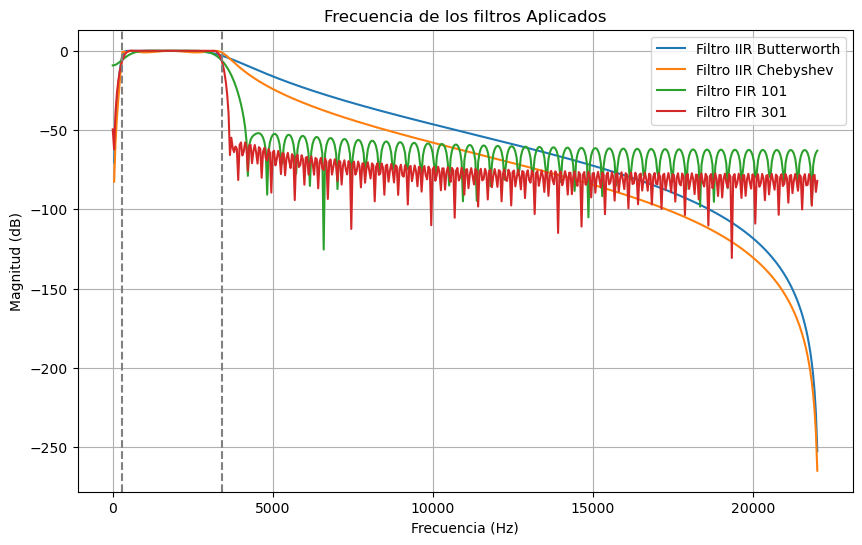

In [44]:
plt.figure(figsize=(10,6))

for b, a, label in [
    (b_butt, a_butt, "Filtro IIR Butterworth"),
    (b_cheb, a_cheb, "Filtro IIR Chebyshev")
]:
    w, h = freqz(b, a, fs=fs)
    plt.plot(w, 20*np.log10(abs(h)), label=label)

for fir, label in [
    (fir_101, "Filtro FIR 101"),
    (fir_301, "Filtro FIR 301")
]:
    w, h = freqz(fir, fs=fs)
    plt.plot(w, 20*np.log10(abs(h)), label=label)

plt.axvline(lowcut, linestyle="--", color="gray")
plt.axvline(highcut, linestyle="--", color="gray")

plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.title("Frecuencia de los filtros Aplicados")
plt.legend()
plt.grid()
plt.show()


Métricas (MSE y SNR)

In [45]:
def mse(x, y):
    return np.mean((x - y)**2)

def snr(signal, noise):
    return 10 * np.log10(np.sum(signal**2) / np.sum(noise**2))

filters = {
    "Filtro IIR Butterworth": audio_iir_butt,
    "Filtro IIR Chebyshev": audio_iir_cheb,
    "Filtro FIR 101": audio_fir_101,
    "Filtro FIR 301": audio_fir_301
}

for name, sig in filters.items():
    print(name)
    print("  MSE:", mse(audio, sig))
    print("  SNR:", snr(sig, audio - sig))


Filtro IIR Butterworth
  MSE: 0.030142328055847586
  SNR: -0.9545485601684951
Filtro IIR Chebyshev
  MSE: 0.031087783112143465
  SNR: -1.6929721840828826
Filtro FIR 101
  MSE: 0.08679717979204761
  SNR: -5.762508582571383
Filtro FIR 301
  MSE: 0.07840062415850949
  SNR: -5.000723012186548


## Conclusión

En este trabajo se realizó una comparación entre filtros pasa banda de tipo IIR y FIR aplicados a una señal de voz contaminada con ruido blanco.
Los resultados obtenidos muestran que el filtro IIR Butterworth presenta una buena reducción de ruido con un bajo costo computacional; sin embargo, introduce distorsión de fase, perceptible en la calidad del audio.
Por otro lado, los filtros FIR, especialmente el de orden 301, ofrecen una respuesta en frecuencia más selectiva, fase lineal y mejores métricas objetivas (mayor SNR y menor MSE), lo que se traduce en una mayor calidad perceptual del audio filtrado.
En conclusión, para aplicaciones donde la calidad del audio es prioritaria, el filtro FIR de mayor orden resulta la mejor opción, mientras que el filtro IIR es adecuado para aplicaciones en tiempo real donde se requiere menor complejidad computacional.